# Course code : CMPE-257 Sec 99 Decision Tree Assignment


> Group name : Insurgents_Sales Prediction 



> Group Submission by


1.   Chaitrali Deshmukh(012501489)
2.   Prathyusha Kasibhatta(013774163)
3.   Sandhya Gadgoli(013798759)
4.   Saylee Vyawahare(013801294)





In [0]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train = pd.read_csv("/content/drive/My Drive/Walmart_Train.csv")
test = pd.read_csv("/content/drive/My Drive/Test.csv")

In [0]:
#Check for duplicates
idsUnique = len(set(train.Item_Identifier))
idsTotal = train.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 6964 duplicate IDs for 8523 total entries



**Exploratory Data Analysis (EDA)**

As part of this assignment we're going to perform some basic data analysis and put up few observations. We had close look on our dataset to find any irregularities so that we can fix them before next phase which is pre-processing.

1.	We have used **Item_Outlet_Sales** as our target variable to get some clarity of the distribution of numerical variables. We have generated histogram to find the distribution.

2.	After numerical data distribution we proceeded to find numerical variables in our chosen dataset predictors. 
Below columns have numerical data:

* Item_Weight                  

* Item_Visibility              

* Item_MRP                     

* Outlet_Establishment_Year     

* Item_Outlet_Sales            

* dtype

3.	We observed if there is any relationship between target variable and numerical variables. The variable **Item_Visibility** had lowest correlation with target variable. Meaning, if the item price is high then it is not greatly visible. So visibility will have more dependency on sales of the item. However, with all the other parameters, this has a negative correlation. **Item MRP** is the most positive correlation. 

4.	Next we proceeded to find predictions with respect to categories. To find categorical prediction, we had to categorize the variables broadly. 

* For **Item_Fat_Content** we observed LowFat and LF , Regular and Reg were the data values which meant same and expressed differently. 
* Another major parameter **Item_Type had 16 types of values**.
* Outlet_Size had only three types so we plotted bar chart to see Outlet_Size and Item_Outlet_Sales variable relation.
* Outlet_Type variable and Item_Outlet_Sales relation revealed that only SuperMarket type had more sales and rest types could be grouped together.

5.	Proceeding with analysis we tried to find relation between Target parameter and predictors as well as predictor relationships. 

* We had assumed that sales will be impacted by location of product in a store. Chart map exposed reverse : lower the product sales for high visibility. It might be due to the fact that the top of the sales chart is dominated by a large number of daily use items that do not need high visibility. 
* 	We also observed that Many products sold were less visible 


Next we proceed to make analysis of two variables. We could examine the idea of the relationship between two variables, if there is a correlation and this association's strength or if there are variations between two variables and the implications of these discrepancies. 

1.	**Role of Item_Fat_Content onItem_Outlet_Sales**
“Low Fat” products were sold in more number than “Regular” products.

2.	**Role of  of Outlet_Identifier on Item_Outlet_Sales**
 Medium size Supermarket Type 3 had more sales than High sized stores.

3.	**Role of Outlet_Size and Outlet_Type on Item_Outlet_Sales**
Consumers tend to prefer shops of medium size 

4.	**Role of Outlet_Location_Type on Item_Outlet_Sales**
It is clear to see that the cities of Tier2 and Tier3 are the ones with the highest store numbers.


Text(0.5, 1.0, 'Item_Outlet_Sales Distribution')

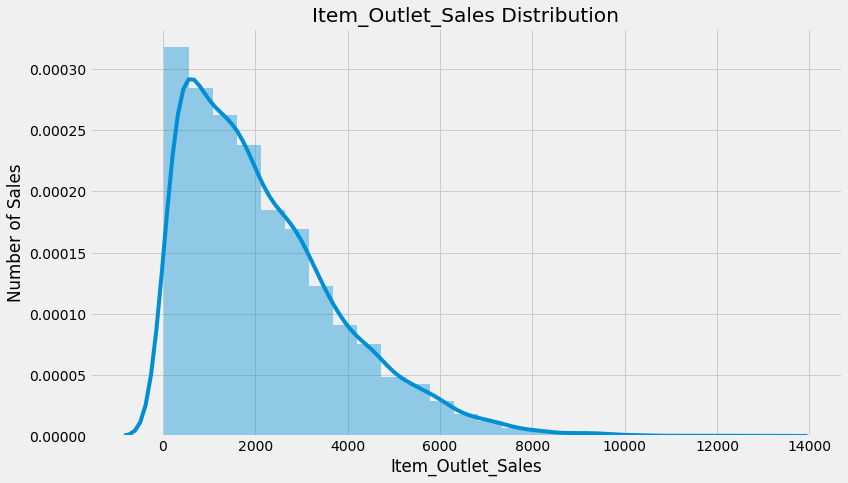

In [0]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(train.Item_Outlet_Sales, bins = 25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")

In [0]:
print ("Skew is:", train.Item_Outlet_Sales.skew())
print("Kurtosis: %f" % train.Item_Outlet_Sales.kurt())

Skew is: 1.1775306028542798
Kurtosis: 1.615877


In [0]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [0]:
corr =numeric_features.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [0]:
print(corr['Item_Outlet_Sales'].sort_values(ascending=False))


Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64


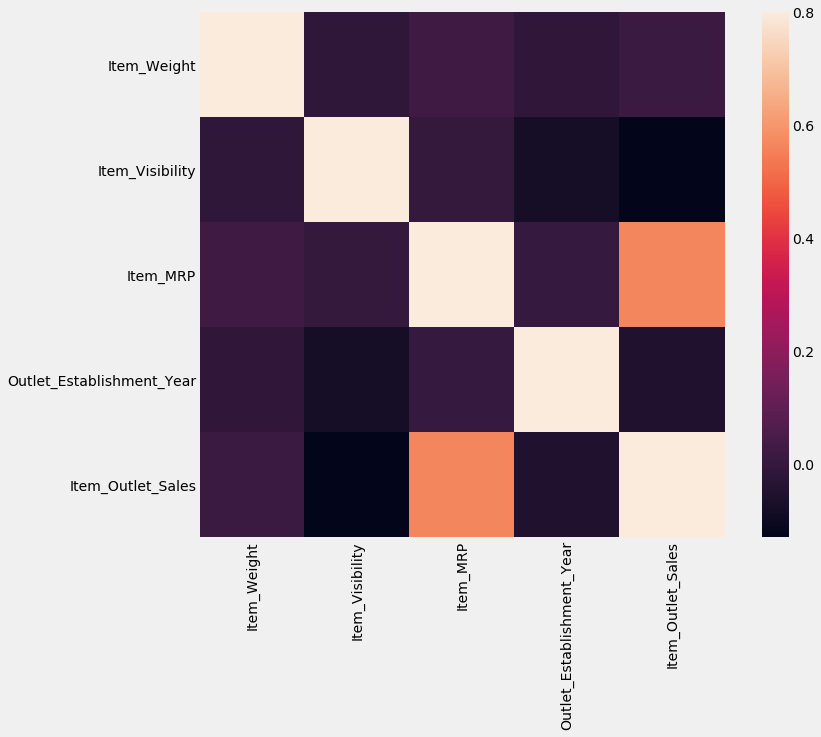

In [0]:
#correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

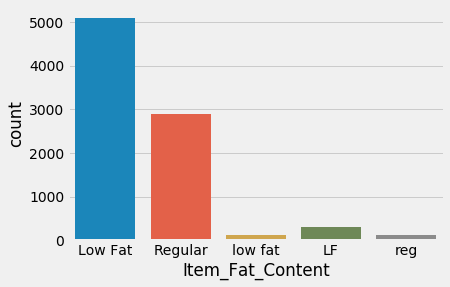

In [0]:
sns.countplot(train.Item_Fat_Content)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

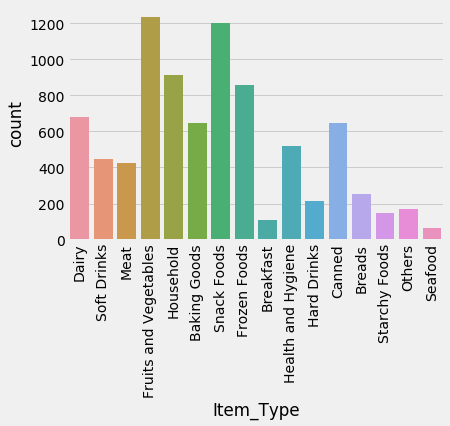

In [0]:
sns.countplot(train.Item_Type)
plt.xticks(rotation=90)

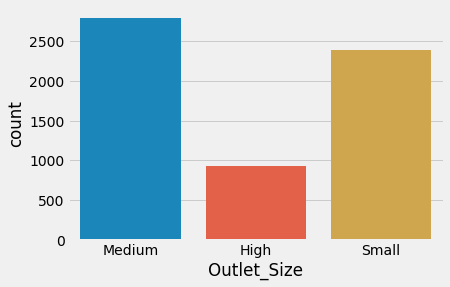

In [0]:
sns.countplot(train.Outlet_Size)


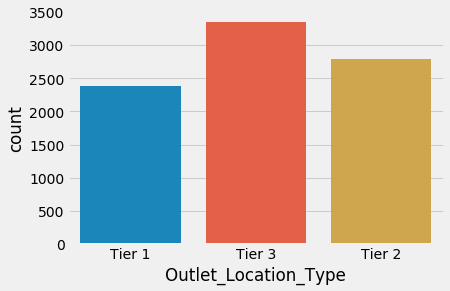

In [0]:
sns.countplot(train.Outlet_Location_Type)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

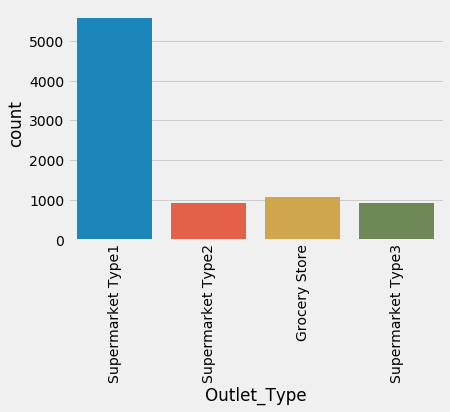

In [0]:
sns.countplot(train.Outlet_Type)
plt.xticks(rotation=90)

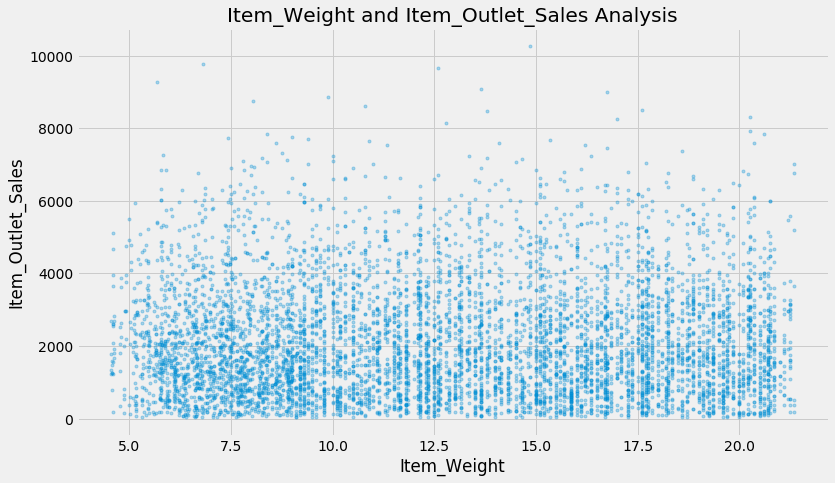

In [0]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Weight, train["Item_Outlet_Sales"],'.', alpha = 0.3)

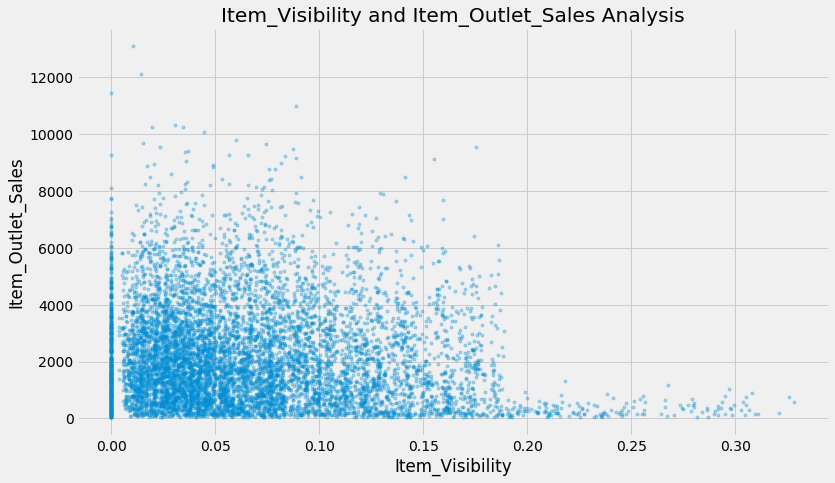

In [0]:
plt.figure(figsize=(12,7))
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Visibility and Item_Outlet_Sales Analysis')
plt.plot(train.Item_Visibility, train['Item_Outlet_Sales'],'.', alpha = 0.3)

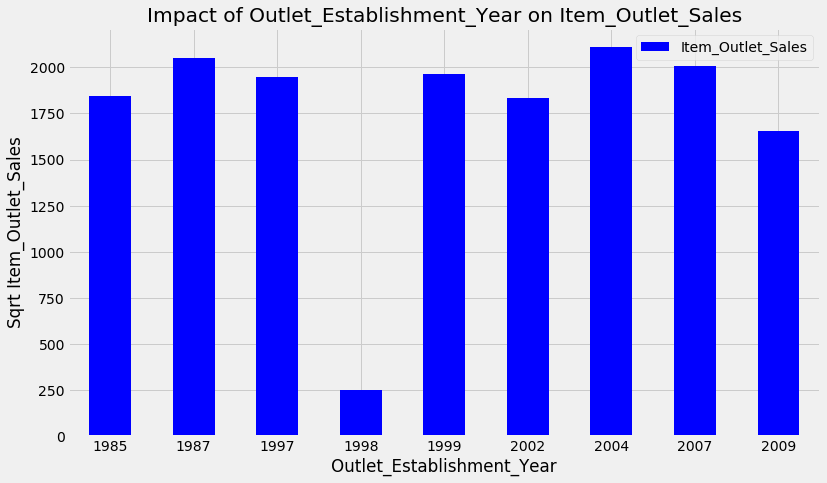

In [0]:
Outlet_Establishment_Year_pivot = \
train.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Sqrt Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

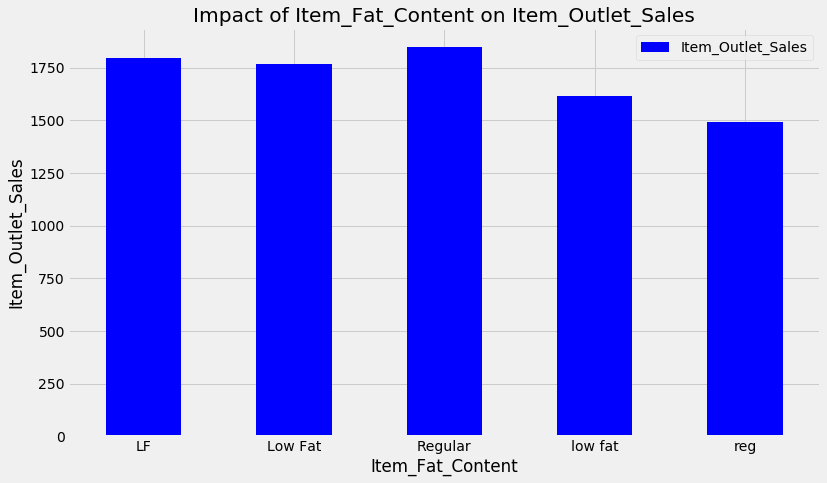

In [0]:
Item_Fat_Content_pivot = \
train.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

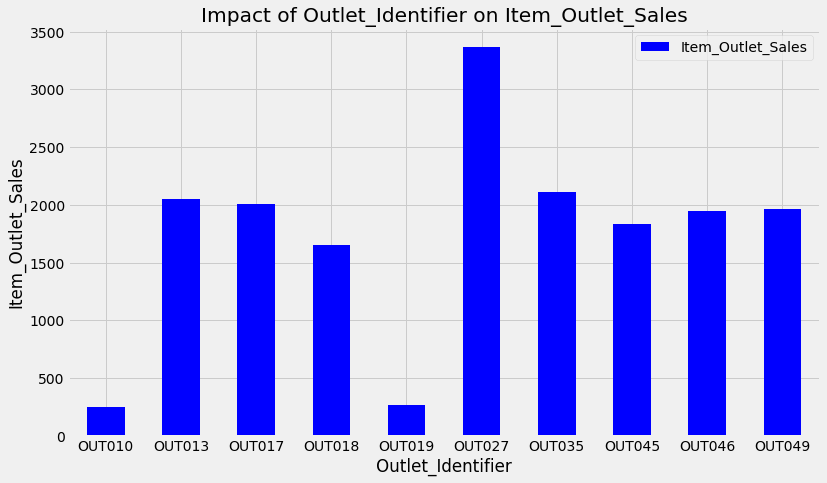

In [0]:
Outlet_Identifier_pivot = \
train.pivot_table(index='Outlet_Identifier', values='Item_Outlet_Sales', aggfunc=np.median)
Outlet_Identifier_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel('Outlet_Identifier')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Outlet_Identifier on Item_Outlet_Sales')
plt.xticks(rotation=0)
plt.show()

In [0]:
train.pivot_table(values='Outlet_Type', columns='Outlet_Identifier',aggfunc=lambda x:x.mode())

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


In [0]:
train.pivot_table(values='Outlet_Type', columns='Outlet_Size',aggfunc=lambda x:x.mode())

Outlet_Size,High,Medium,Small
Outlet_Type,Supermarket Type1,Supermarket Type3,Supermarket Type1


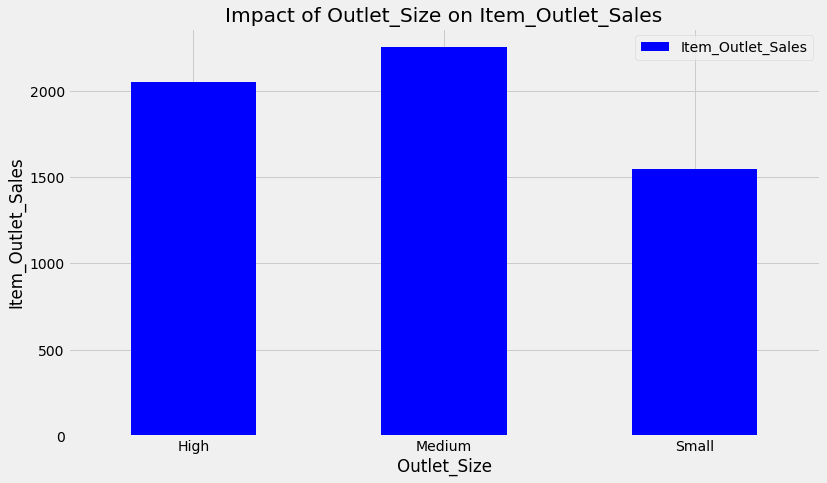

In [0]:
Outlet_Size_pivot = \
train.pivot_table(index='Outlet_Size', values='Item_Outlet_Sales', aggfunc=np.median)
Outlet_Size_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel('Outlet_Size')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Outlet_Size on Item_Outlet_Sales')
plt.xticks(rotation=0)
plt.show()

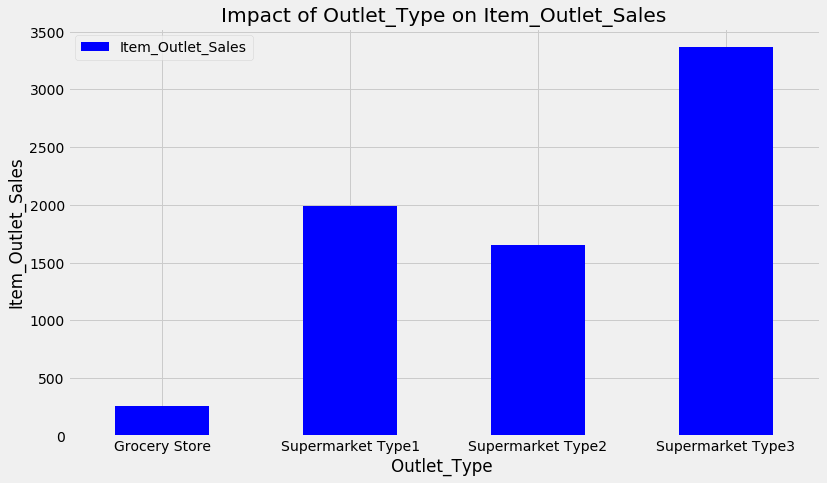

In [0]:
Outlet_Type_pivot = \
train.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

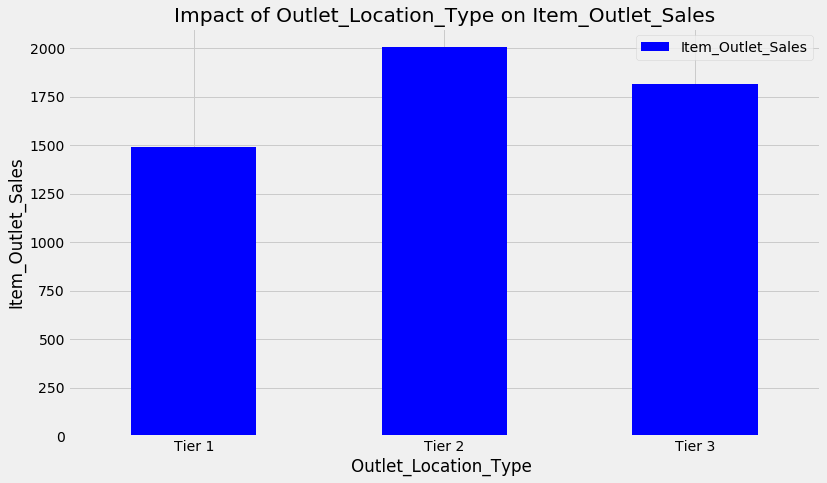

In [0]:
Outlet_Location_Type_pivot = \
train.pivot_table(index='Outlet_Location_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Location_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Location_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Location_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [0]:
train.pivot_table(values='Outlet_Location_Type', columns='Outlet_Type',aggfunc=lambda x:x.mode())

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,Tier 3,Tier 2,Tier 3,Tier 3


# Data Cleaning:

Data cleaning involves observing and rectifying incorrect or corrupted values in the dataset. In our case, we have observed null values in the dataset. To clean and pre-process the data, we have followed the below steps:

1) Merge Training and Testing Datasets

   Instead of cleaning both training and testing datasets separately, it is good to merge them into one and later separate them again. So, we added a source column and merged them into a data frame.
   
2) Identifying NaN values

Pandas can identify the null values and count them. We noted the percentage of null values for each variable.

3) Impute the mean for Missing Values

To fill the null values, we have retrieved all the weights of identifiers. Then, we have calculated the mean weight of all the products within the same identifier.


In [0]:
# Join Train and Test Dataset
#Create source column to later separate the data easily
train['source']='train'
test['source']='test'
data = pd.concat([train,test], ignore_index = True)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
#Check the percentage of null values per variable
data.isnull().sum()/data.shape[0]*100 #show values in percentage

Item_Fat_Content              0.000000
Item_Identifier               0.000000
Item_MRP                      0.000000
Item_Outlet_Sales            39.995776
Item_Type                     0.000000
Item_Visibility               0.000000
Item_Weight                  17.171219
Outlet_Establishment_Year     0.000000
Outlet_Identifier             0.000000
Outlet_Location_Type          0.000000
Outlet_Size                  28.273726
Outlet_Type                   0.000000
source                        0.000000
dtype: float64

In [0]:
#aggfunc is mean by default! Ignores NaN by default
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')
print(item_avg_weight)

                 Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115
DRB24                  8.785
DRB25                 12.300
DRB48                 16.750
DRC01                  5.920
DRC12                 17.850
DRC13                  8.260
DRC24                 17.850
DRC25                  5.730
DRC27                 13.800
DRC36                 13.000
DRC49                  8.670
DRD01                 12.100
DRD12                  6.960
DRD13                 15.000
DRD15                 10.600
DRD24                 13.850
DRD25                  6.135
DRD27                 18.750
DRD37                  9.800
DRD49                  9.895
DRD60                 15.700
DRE01                 10.100
DRE03                 19.600
DRE12                  4.590
DRE13                  6.280
...                      ...
NCX05                 15.200
NCX06         

In [0]:
#Note: The previous ideia becomes more clear if you run this.
data[:][data['Item_Identifier'] == 'DRI11']
def impute_weight(cols):
    Weight = cols[0]
    Identifier = cols[1]
    
    if pd.isnull(Weight):
        return item_avg_weight['Item_Weight'][item_avg_weight.index == Identifier]
    else:
        return Weight
print ('Orignal #missing: %d'%sum(data['Item_Weight'].isnull()))
data['Item_Weight'] = data[['Item_Weight','Item_Identifier']].apply(impute_weight,axis=1).astype(float)
print ('Final #missing: %d'%sum(data['Item_Weight'].isnull()))


Orignal #missing: 2439
Final #missing: 0


In [0]:
#Import mode function:
from scipy.stats import mode
#Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=lambda x:x.mode())
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [0]:
def impute_size_mode(cols):
    Size = cols[0]
    Type = cols[1]
    if pd.isnull(Size):
        return outlet_size_mode.loc['Outlet_Size'][outlet_size_mode.columns == Type][0]
    else:
        return Size
print ('Orignal #missing: %d'%sum(data['Outlet_Size'].isnull()))
data['Outlet_Size'] = data[['Outlet_Size','Outlet_Type']].apply(impute_size_mode,axis=1)
print ('Final #missing: %d'%sum(data['Outlet_Size'].isnull()))


Orignal #missing: 4016
Final #missing: 0


In [0]:
#Creates pivot table with Outlet_Type and the mean of #Item_Outlet_Sales. Agg function is by default mean()
data.pivot_table(values='Item_Outlet_Sales', columns='Outlet_Type')

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Outlet_Sales,339.8285,2316.181148,1995.498739,3694.038558


In [0]:
visibility_item_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')




In [0]:
def impute_visibility_mean(cols):
    visibility = cols[0]
    item = cols[1]
    if visibility == 0:
        return visibility_item_avg['Item_Visibility'][visibility_item_avg.index == item]
    else:
        return visibility

In [0]:
print ('Original zeros: %d' % sum(data['Item_Visibility'] == 0))
data['Item_Visibility'] = data[['Item_Visibility', 'Item_Identifier']].apply(impute_visibility_mean, axis=1).astype(float)


Original zeros: 879


In [0]:
print ('Final zeros: %d' % sum(data['Item_Visibility'] == 0))
# Remember the data is from 2013
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

Final zeros: 0


count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [0]:
# Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])

In [0]:
# Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD': 'Food', 'NC': 'Non-Consumable', 'DR': 'Drinks'})

data['Item_Type_Combined'].value_counts()

data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular',
                                                             'low fat': 'Low Fat'})

In [0]:
print(data['Item_Fat_Content'].value_counts())


Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [0]:
# Mark non-consumables as separate category in low_fat:

data.loc[data['Item_Type_Combined'] == "Non-Consumable", 'Item_Fat_Content'] = "Non-Edible"

data['Item_Fat_Content'].value_counts()


def func(x): return x['Item_Visibility'] / visibility_item_avg['Item_Visibility'][visibility_item_avg.index == x['Item_Identifier']][0]


data['Item_Visibility_MeanRatio'] = data.apply(func, axis=1).astype(float)
data['Item_Visibility_MeanRatio'].describe()


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [0]:
# New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])

var_mod = ['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size', 'Item_Type_Combined', 'Outlet_Type', 'Outlet']

for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [0]:
#Dummy Variables:
#data = pd.get_dummies(data, columns =['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'])
#data.dtypes

In [0]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Outlet_Years,Item_Type_Combined,Item_Visibility_MeanRatio,Outlet
0,0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,0,1,1,train,14,1,0.931078,9
1,2,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,2,1,2,train,4,0,0.933420,3
2,0,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,0,1,1,train,14,1,0.960069,9
3,2,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,2,2,0,train,15,1,1.000000,0
4,1,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,2,0,1,train,26,2,1.000000,1


In [0]:
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [0]:
#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

In [0]:
#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# **Model Building**

In [0]:
#Export files as modified versions:
train.to_csv("Walmart_Train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [0]:
train_df = pd.read_csv('Walmart_Train_modified.csv')
test_df = pd.read_csv('test_modified.csv')


In [0]:
train_df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Outlet_Years,Item_Type_Combined,Item_Visibility_MeanRatio,Outlet
0,0,FDA15,249.8092,3735.1380,0.016047,9.30,OUT049,0,1,1,14,1,0.931078,9
1,2,DRC01,48.2692,443.4228,0.019278,5.92,OUT018,2,1,2,4,0,0.933420,3
2,0,FDN15,141.6180,2097.2700,0.016760,17.50,OUT049,0,1,1,14,1,0.960069,9
3,2,FDX07,182.0950,732.3800,0.017834,19.20,OUT010,2,2,0,15,1,1.000000,0
4,1,NCD19,53.8614,994.7052,0.009780,8.93,OUT013,2,0,1,26,2,1.000000,1


# **Decision Tree Regression**

Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output. Continuous output means that the output/result is not discrete, i.e., it is not represented just by a discrete, known set of numbers or values.

Regression : sum(y — prediction)²


In [0]:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier', 'Outlet_Identifier']


In [0]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [0]:
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)
    


Model Report
RMSE : 1058
CV Score : Mean - 1092 | Std - 45.4 | Min - 1008 | Max - 1189


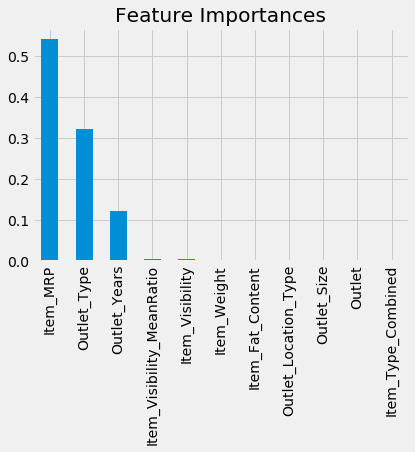

In [0]:
predictors = train_df.columns.drop(['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier'])
#modelfit(LR, train_df, test_df, predictors, target, IDcol, 'LR.csv')

# Decision Tree model
from sklearn.tree import DecisionTreeRegressor
alg3 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(alg3, train_df, test_df, predictors, target, IDcol, 'alg3.csv')
coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')


Model Report
RMSE : 1068
CV Score : Mean - 1096 | Std - 43.25 | Min - 1033 | Max - 1182


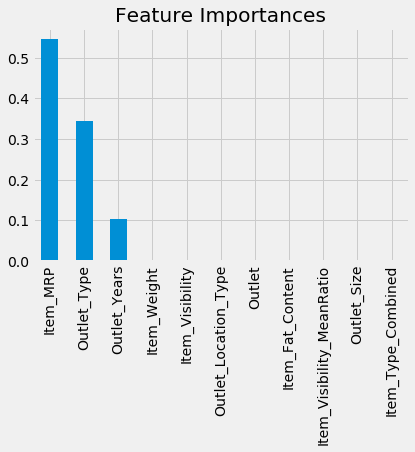

In [0]:
alg3 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(alg3, train_df, test_df, predictors, target, IDcol, 'alg3.csv')
coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')

In [0]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [0]:
#loading the dataset
dataset = pd.read_csv('/content/drive/My Drive/train_modified.csv')

In [0]:
#split dataset in features and target variable
feature_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
                'Outlet_Location_Type_0', 'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0', 'Outlet_Size_1', 'Outlet_Size_2',
                'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3', 'Item_Type_0', 'Item_Type_1', 'Item_Type_2',
                'Item_Type_3', 'Item_Type_4', 'Item_Type_5', 'Item_Type_6', 'Item_Type_7', 'Item_Type_8', 'Item_Type_9', 'Item_Type_10',
                'Item_Type_11', 'Item_Type_12', 'Item_Type_13', 'Item_Type_14', 'Item_Type_15']

In [0]:
# Features
X = dataset[feature_cols] 

X.head(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Item_Type_15
0,10.395000,0.073297,51.4008,2009,3,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,12.792854,0.035400,144.5444,1985,5,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,12.792854,0.057557,107.6938,1985,4,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
S = dataset.Item_Outlet_Sales

#converting float values into int
S1 = S.round(0).astype(int)

# Target variable
y = S1

y.head(3)

0     557
1    4064
2     214
Name: Item_Outlet_Sales, dtype: int64

In [0]:
# Split dataset into training set and test set

# 70% into training set and 30% into testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

## **Decision Tree with criterion as gini index**


In [0]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

# **Visualization of the Decision Tree with criterion as gini index**


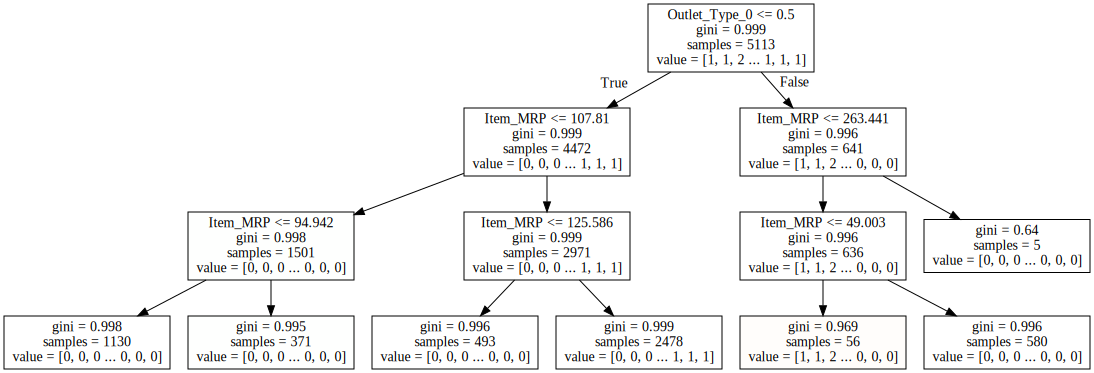

array([ 663, 3436, 3436, ...,  127, 3436, 3436])

In [0]:
graph = Source(tree.export_graphviz(clf_gini, out_file=None
   , feature_names=feature_cols, filled = True))
display(SVG(graph.pipe(format='svg')))

y_pred = clf_gini.predict(X_test)
y_pred

In [0]:
print("Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  0.23460410557184752


In [0]:
predictions = clf_gini.predict(X_test)
true_positives = 1.0
false_positives = 1.0
true_negatives = 1.0
false_negatives = 1.0
for i in range(0, len(y_test.values)):
    if (y_test.values[i] == predictions[i]):
        if (predictions[i] == 1.0):
            true_positives+=1.0
        else:
            true_negatives+=1.0
    else:
        if (predictions[i] == 1.0):
            false_positives += 1.0
        else:
            false_negatives += 1.0
            
print ("True positives:", true_positives)
print ("False positives:", false_positives)

print ("True Negatives:", true_negatives)
print ("False Negatives:", false_negatives)
prec = true_positives / (true_positives  + false_positives)
recall_score = true_positives / (true_positives  + false_negatives)
print ("precision:", prec)
print ("recall:", recall_score)
f1score = 2 * prec * recall_score / (prec + recall_score)
print ("f1score:", f1score)


True positives: 1.0
False positives: 1.0
True Negatives: 9.0
False Negatives: 3403.0
precision: 0.5
recall: 0.0002937720329024677
f1score: 0.0005871990604815032


# **Decision Tree with criterion as information gain**


In [0]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100)
                     
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

# **Visualization of the Decision Tree with criterion as information gain**


In [0]:
graph = Source(tree.export_graphviz(clf_entropy, out_file=None
   , feature_names=feature_cols, filled = True))
display(SVG(graph.pipe(format='svg')))

In [0]:
y_pred = clf_entropy.predict(X_test)
y_pred
print("Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  1.3196480938416422


In [0]:
predictions = clf_entropy.predict(X_test)
true_positives = 1.0
false_positives = 1.0
true_negatives = 1.0
false_negatives = 1.0
for i in range(0, len(y_test.values)):
    if (y_test.values[i] == predictions[i]):
        if (predictions[i] == 1.0):
            true_positives+=1.0
        else:
            true_negatives+=1.0
    else:
        if (predictions[i] == 1.0):
            false_positives += 1.0
        else:
            false_negatives += 1.0
            
print ("True positives:", true_positives)
print ("False positives:", false_positives)

print ("True Negatives:", true_negatives)
print ("False Negatives:", false_negatives)
prec = true_positives / (true_positives  + false_positives)
recall_score = true_positives / (true_positives  + false_negatives)
print ("precision:", prec)
print ("recall:", recall_score)
f1score = 2 * prec * recall_score / (prec + recall_score)
print ("f1score:", f1score)

True positives: 1.0
False positives: 1.0
True Negatives: 46.0
False Negatives: 3366.0
precision: 0.5
recall: 0.000297000297000297
f1score: 0.0005936479667557138


In [0]:
#Classification Report & Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix


print("Classification Report: ", 
      classification_report(y_test, y_pred))

print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred))

Classification Report:                precision    recall  f1-score   support

          33       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         2
          38       0.00      0.00      0.00         2
          39       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         1
          41       0.03      1.00      0.05         1
          42       0.00      0.00      0.00         1
          43       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         2
          46       0.00      0.00      0.00         1
          49       0.00      0.00      0.00         1
          50       0.00      0.00      0.00         1
          51       0.00      0.00      0.00         2
          55       0.00      0.00      0.00         1
          57       0.00      0.00      0.00         1
          59       0.00      0.00      0.00         2
          63       0.00      0.00      0.00         1
   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)




# Visualizing Decision Trees



> Classification is a two-step process, learning step and prediction step. In the learning step, the model is developed based on given training data. In the prediction step, the model is used to predict the response for given data. 



> Decision trees are based on recursive partitioning. Each internal node represents a feature or an attribute, branch represents decision rule and leaf node represents the outcome.
In this classification, we have selected Item_Outlet_sale as the target variable and all the other columns except Item_Identifier and Outlet_Identifier have been included in the Feature columns.



> The root node of the generated decision tree is Outlet_type 0. The leaf nodes vary between different features like Item_Type, Item_MRP, Item_Weight, etc. Some of the subtrees are based on if Item_MRP <= 39.066 then again, the partition is made which is based on if the Item_Weight <= 7.84. It again partitions the tree based on Item_visibility. By just visually seeing the dataset, it’s difficult to capture all these minute details at first place. However, in just few minutes, now we can analyze these factors and make some classification and predictions out of it.








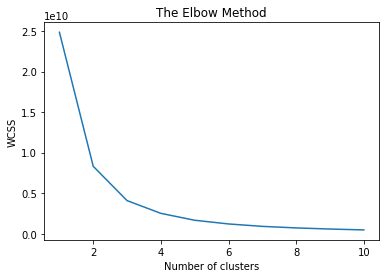

In [0]:
X = dataset.iloc[:, [3,6]].values

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

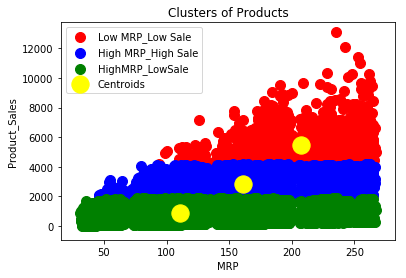

In [0]:
# Applying k-means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)



#Visualizing the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Low MRP_Low Sale')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'High MRP_High Sale')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'HighMRP_LowSale')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Products')
plt.xlabel('MRP')
plt.ylabel('Product_Sales')
plt.legend()
plt.show()